# Introduction to Linear Regression

<img src="images/moneyball.jpg"/>

## Batter up 

The movie [Moneyball](http://en.wikipedia.org/wiki/Moneyball_(film)) focuses on the "quest for the secret of success in baseball". It follows a low-budget team, the Oakland Athletics, who believed that underused statistics, such as a player's  ability to get on base, better predict the ability to score runs than typical statistics like home runs, RBIs (runs batted in), and batting average. Obtaining players who excelled in these underused statistics turned out to be much more 
affordable for the team.

In this lab we'll be looking at data from all 30 Major League Baseball teams and examining the linear relationship between runs scored in a season and a number  of other player statistics. Our aim will be to summarize these relationships both graphically and numerically in order to find which variable, if any, helps us best predict a team's runs scored in a season.

### Load Libraries

In [1]:
#install.packages("package")
library(statsr)
library(dplyr)
library(ggplot2)
library(tidyr)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




### Load Data

In [2]:
data(mlb11)
head(mlb11)

team,runs,at_bats,hits,homeruns,bat_avg,strikeouts,stolen_bases,wins,new_onbase,new_slug,new_obs
<fct>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
Texas Rangers,855,5659,1599,210,0.283,930,143,96,0.340,0.460,0.800
Boston Red Sox,875,5710,1600,203,0.280,1108,102,90,0.349,0.461,0.810
Detroit Tigers,787,5563,1540,169,0.277,1143,49,95,0.340,0.434,0.773
Kansas City Royals,730,5672,1560,129,0.275,1006,153,71,0.329,0.415,0.744
St. Louis Cardinals,762,5532,1513,162,0.273,978,57,90,0.341,0.425,0.766
New York Mets,718,5600,1477,108,0.264,1085,130,77,0.335,0.391,0.725


In addition to runs scored, there are seven traditionally used variables in the  data set: at-bats, hits, home runs, batting average, strikeouts, stolen bases, and wins. There are also three newer variables: on-base percentage, slugging percentage, and on-base plus slugging. For the first portion of the analysis we'll consider the seven traditional variables. At the end of the lab, you'll work with the three newer variables on your own.

**1. What type of plot would you use to display the relationship between `runs` and one of the other numerical variables?**

Answer:scatterplot.

**2. Plot the relationship between `runs` and `at_bats`, using `at_bats` as the explanatory variable. <br> The relationship appears to be ...**

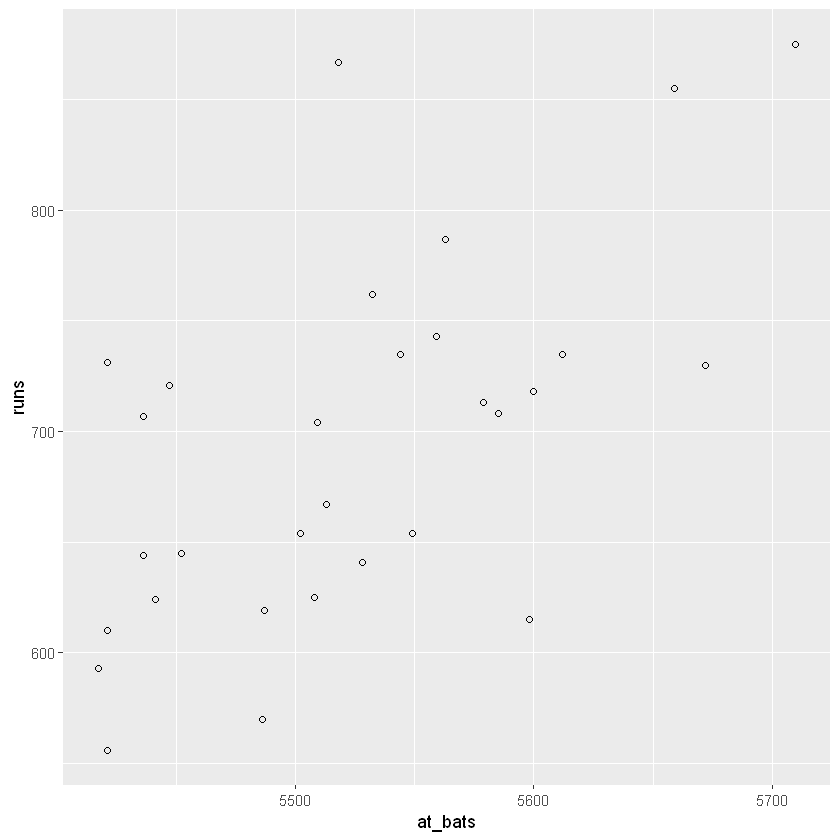

In [3]:
ggplot(data = mlb11, aes(x = at_bats, y = runs)) + 
    geom_point(shape = 1)

Answer: linear.

**Exercise**: If you knew a team's `at_bats`, would you be comfortable using a linear model to predict their number of runs?

If the relationship looks linear, we can quantify the strength of the relationship with the correlation coefficient.

In [4]:
mlb11 %>%
  summarise(cor(runs, at_bats))

"cor(runs, at_bats)"
<dbl>
0.610627


### Sum of squared residuals

In this section you will use an interactive function to investigate what we mean by "sum of squared residuals". You will need to run this function in your console, not in your markdown document. Running the function also requires that the `mlb11` dataset is loaded in your environment.

Think back to the way that we described the distribution of a single variable. Recall that we discussed characteristics such as center, spread, and shape. It's also useful to be able to describe the relationship of two numerical variables, such as `runs` and `at_bats` above.

**3. Looking at your plot from the previous exercise, which of the following best describe the relationship between these two variables?**

Answer: The relationship is positive, linear, and moderately strong. One of the potential outliers is a team with approximately 5520 at bats.

Just as we used the mean and standard deviation to summarize a single variable, we can summarize the relationship between these two variables by finding the line that best follows their association. Use the following interactive function to select the line that you think does the best job of going through the cloud of points.

                                
Call:
lm(formula = y ~ x, data = pts)

Coefficients:
(Intercept)            x  
 -2789.2429       0.6305  

Sum of Squares:  123721.9

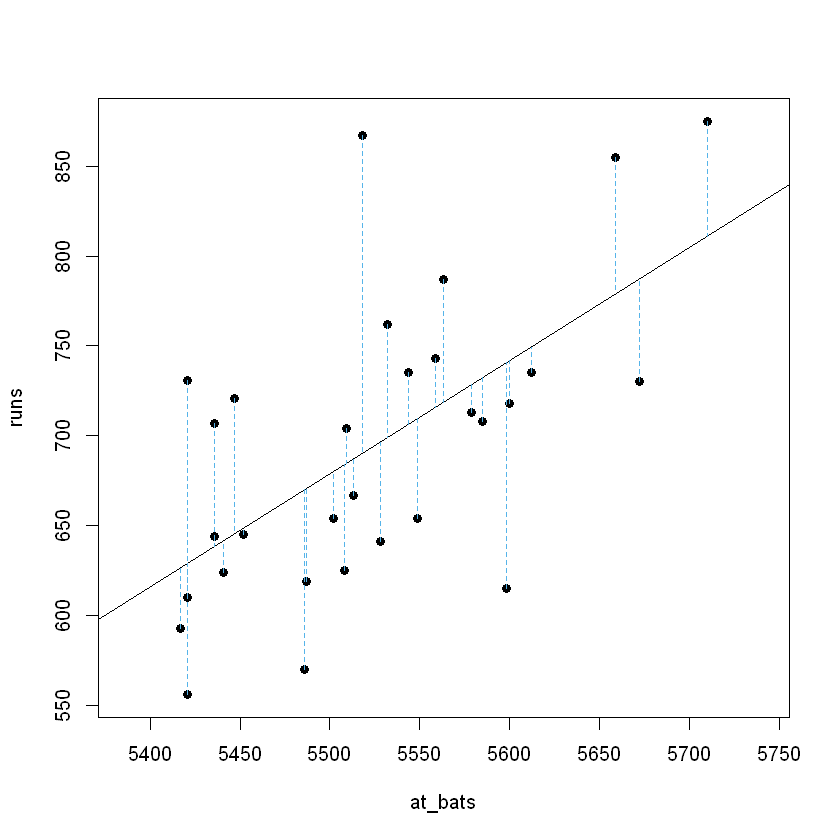

In [5]:
plot_ss(x = at_bats, y = runs, data = mlb11)

After running this command, you'll be prompted to click two points on the plot to define a line. Once you've done that, the line you specified will be shown in
black and the residuals in blue. Note that there are 30 residuals, one for each of the 30 observations. Recall that the residuals are the difference between the
observed values and the values predicted by the line:

$$
  e_i = y_i - \hat{y}_i
$$

The most common way to do linear regression is to select the line that minimizes the sum of squared residuals. To visualize the squared residuals, you can rerun the plot command and add the argument `showSquares = TRUE`.

                                
Call:
lm(formula = y ~ x, data = pts)

Coefficients:
(Intercept)            x  
 -2789.2429       0.6305  

Sum of Squares:  123721.9

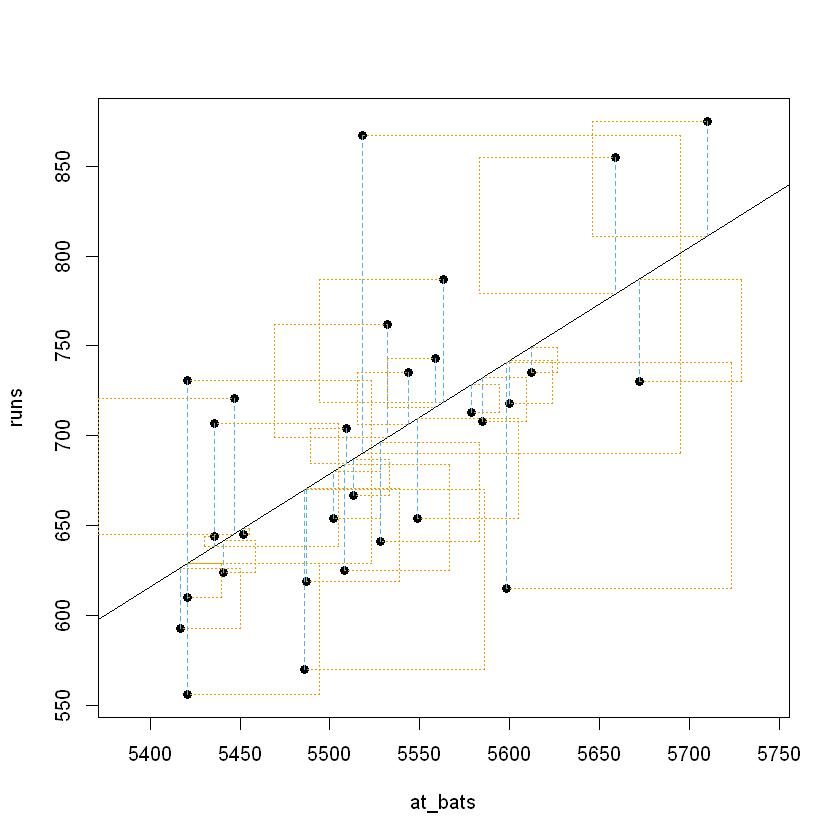

In [6]:
plot_ss(x = at_bats, y = runs, data = mlb11, showSquares = TRUE)

Note that the output from the `plot_ss` function provides you with the slope and intercept of your line as well as the sum of squares.

## The Linear Model

It is rather cumbersome to try to get the correct least squares line, i.e. the line that minimizes the sum of squared residuals, through trial and error. Instead we can use the `lm` function in R to fit the linear model (a.k.a. regression line).

In [7]:
m1 <- lm(runs ~ at_bats, data = mlb11)

The first argument in the function `lm` is a formula that takes the form `y ~ x`. Here it can be read that we want to make a linear model of `runs` as a function of `at_bats`. The second argument specifies that R should look in the `mlb11` data frame to find the `runs` and `at_bats` variables.

The output of `lm` is an object that contains all of the information we need about the linear model that was just fit. We can access this information using the summary function.

In [8]:
summary(m1)


Call:
lm(formula = runs ~ at_bats, data = mlb11)

Residuals:
    Min      1Q  Median      3Q     Max 
-125.58  -47.05  -16.59   54.40  176.87 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2789.2429   853.6957  -3.267 0.002871 ** 
at_bats         0.6305     0.1545   4.080 0.000339 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 66.47 on 28 degrees of freedom
Multiple R-squared:  0.3729,	Adjusted R-squared:  0.3505 
F-statistic: 16.65 on 1 and 28 DF,  p-value: 0.0003388


Let's consider this output piece by piece. First, the formula used to describe the model is shown at the top. After the formula you find the five-number summary of the residuals. The "Coefficients" table shown next is key; its first column displays the linear model's y-intercept and the coefficient of `at_bats`. With this table, we can write down the least squares regression line for the linear model:

$$
  \hat{y} = -2789.2429 + 0.6305 \times at\_bats
$$

One last piece of information we will discuss from the summary output is the Multiple R-squared, or more simply, $R^2$. The $R^2$ value represents the proportion of variability in the response variable that is explained by the explanatory variable. For this model, 37.3% of the variability in runs is explained by at-bats.

**4. Fit a new model that uses `homeruns` to predict `runs`.  Using the estimates from the R output, write the equation of the regression line. What does the slope tell us in the context of the relationship between success of a team and its home runs?**

In [9]:
ml2 = lm(runs ~ homeruns, data = mlb11)

summary(ml2)


Call:
lm(formula = runs ~ homeruns, data = mlb11)

Residuals:
    Min      1Q  Median      3Q     Max 
-91.615 -33.410   3.231  24.292 104.631 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 415.2389    41.6779   9.963 1.04e-10 ***
homeruns      1.8345     0.2677   6.854 1.90e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 51.29 on 28 degrees of freedom
Multiple R-squared:  0.6266,	Adjusted R-squared:  0.6132 
F-statistic: 46.98 on 1 and 28 DF,  p-value: 1.9e-07


Answer: For each additional home run, the model predicts 1.83 more runs, on average.

## Prediction and prediction errors

Let's create a scatterplot with the least squares line for `m1` laid on top.

`geom_smooth()` using formula 'y ~ x'



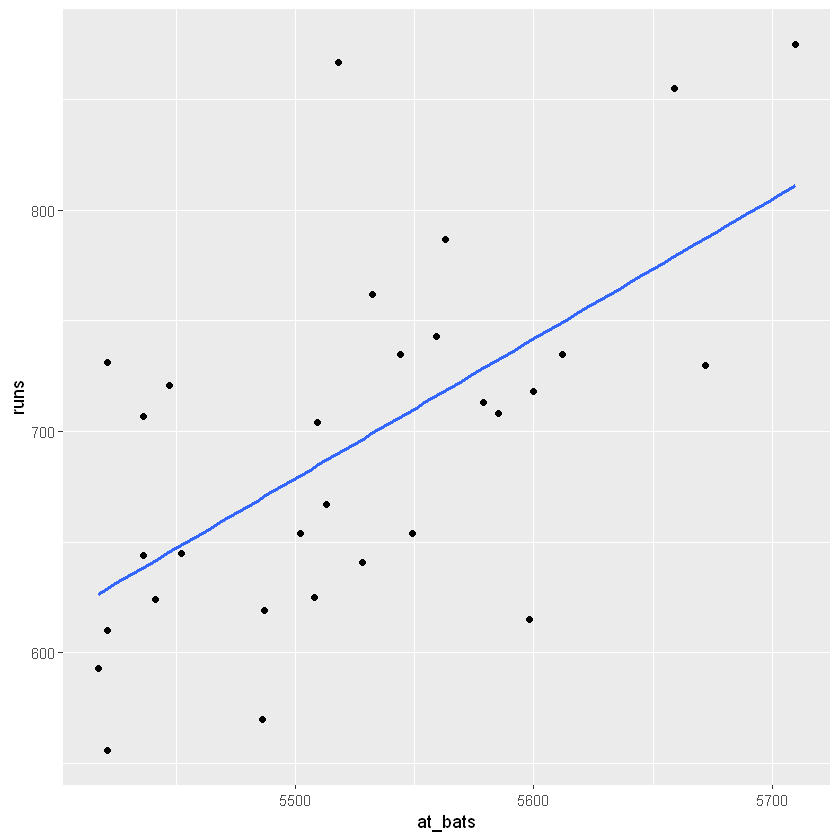

In [10]:
ggplot(data = mlb11, aes(x = at_bats, y = runs)) +
  geom_point() +
  stat_smooth(method = "lm", se = FALSE)

Here we are literally adding a layer on top of our plot. `stat_smooth` creates the line by fitting a linear model. It can also show us the standard error `se` associated with our line, but we'll suppress that for now.

This line can be used to predict $y$ at any value of $x$. When predictions are made for values of $x$ that are beyond the range of the observed data, it is referred to as *extrapolation* and is not usually recommended. However, predictions made within the range of the data are more reliable. They're also used to compute the residuals.

**Exercise**: If a team manager saw the least squares regression line and not the actual data, how many runs would he or she predict for a team with 5,579 at-bats? Is this an overestimate or an underestimate, and by how much?

To find the observed number of runs for the team with 5,579 at bats you can use the following:

In [11]:
# This code first filters for rows observation. `at_bats` is 5579, and then shows the value of the `runs variable for 
# that observation.

mlb11 %>%
  filter(at_bats == 5579) %>%
  select(runs)

runs
<int>
713


**5. What is the residual for the prediction of runs for a team with 5,579 at-bats?**

In [12]:
actual_runs <- mlb11 %>%  filter(at_bats == 5579) %>%  select(runs)

regCoeff <- lm(runs ~ at_bats, data = mlb11)$coefficients["at_bats"]

regIntercept <- lm(runs ~ at_bats, data = mlb11)$coefficients["(Intercept)"]

predicted_runs <- regCoeff*5579 + regIntercept

In [13]:
actual_runs - predicted_runs

runs
<dbl>
-15.59552


Answer: -15.32.

## Model Diagnostics

To assess whether the linear model is reliable, we need to check for:


1. linearity;
2. nearly normal residuals;
3. constant variability.

**Linearity**: You already checked if the relationship between runs and at-bats is linear using a scatterplot. We should also verify this condition with a plot of the residuals vs. fitted (predicted) values.

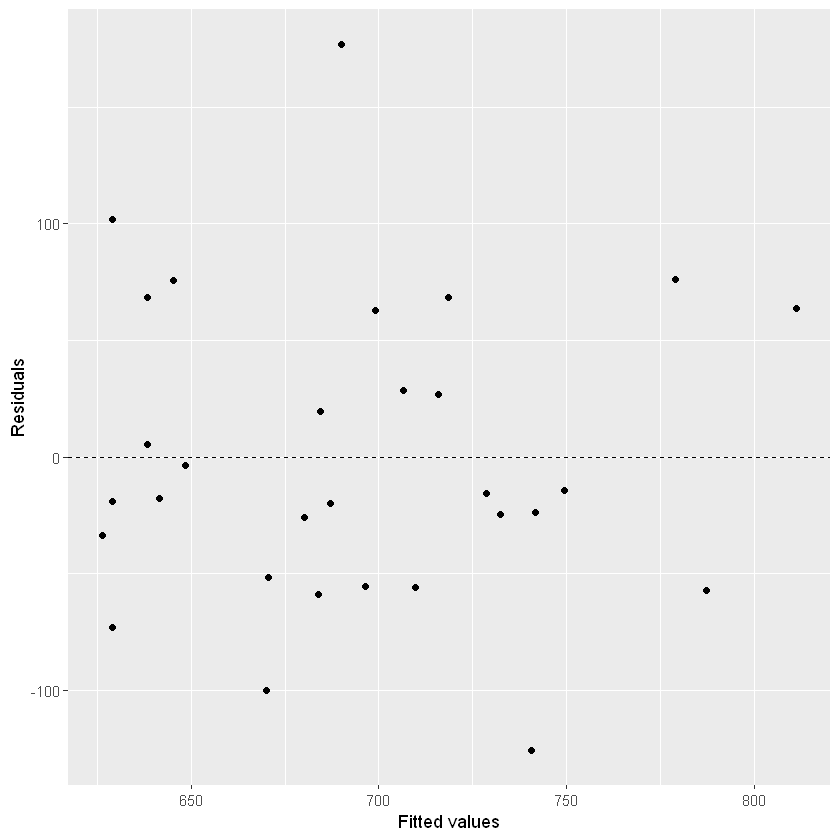

In [14]:
ggplot(data = m1, aes(x = .fitted, y = .resid)) +
  geom_point() +
  geom_hline(yintercept = 0, linetype = "dashed") +
  xlab("Fitted values") +
  ylab("Residuals")

Notice here that our model object `m1` can also serve as a data set because stored within it are the fitted values ($\hat{y}$) and the residuals. Also note that we're getting fancy with the code here. After creating the scatterplot on the first layer (first line of code), we overlay a horizontal dashed line at $y = 0$ (to help us check whether residuals are distributed around 0), and we also adjust the axis labels to be more informative.

**6. Which of the following statements about the residual plot is True?**

Answer:

    The residuals appear to be randomly distributed around 0. 
    The plot is indicative of a linear relationship between runs and at-bats.
    The team with a very high residual compared to the others appears to be an outlier.

**Nearly normal residuals**: To check this condition, we can look at a histogram

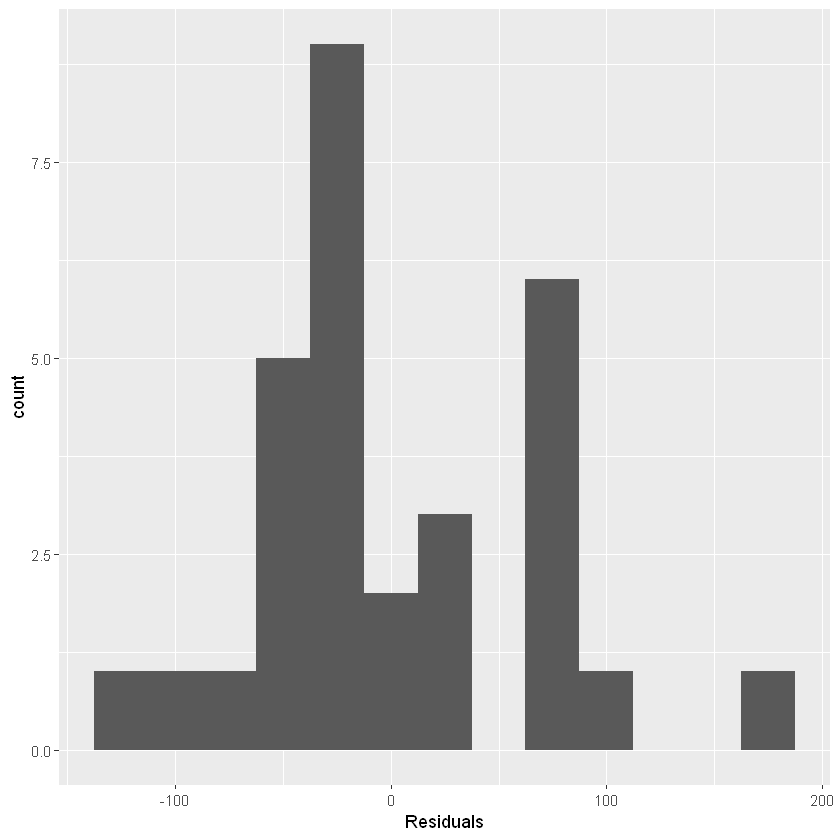

In [15]:
ggplot(data = m1, aes(x = .resid)) +
  geom_histogram(binwidth = 25) +
  xlab("Residuals")

Or a normal probability plot of the residuals.

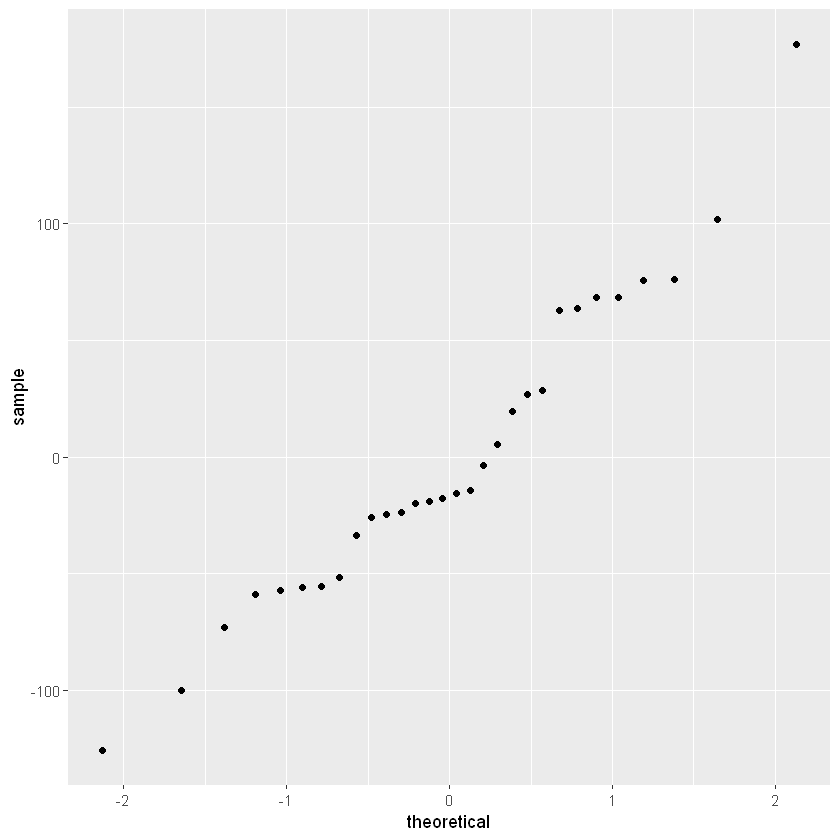

In [16]:
ggplot(data = m1, aes(sample = .resid)) +
  stat_qq()

Note that the syntax for making a normal probability plot is a bit different than what you're used to seeing: we set `sample` equal to the residuals instead of `x`, and we set a statistical method `qq`, which stands for "quantile-quantile", another name commonly used for normal probability plots.

**7. Which of the following is true?**

Answer: The residuals are fairly symmetric, with only a slightly longer tail on the right, hence it would be appropriate to deem the the normal distribution of residuals condition met.

### Constant variability:

**8. Based on the residuals plot from earlier, the constant variability condition appears to be met.** 

Answer: True.

**Exercise**: Choose another one of the seven traditional variables from `mlb11` besides `at_bats` that you think might be a good predictor of `runs`. Produce a scatterplot of the two variables and fit a linear model. At a glance, does there seem to be a linear relationship?

`geom_smooth()` using formula 'y ~ x'



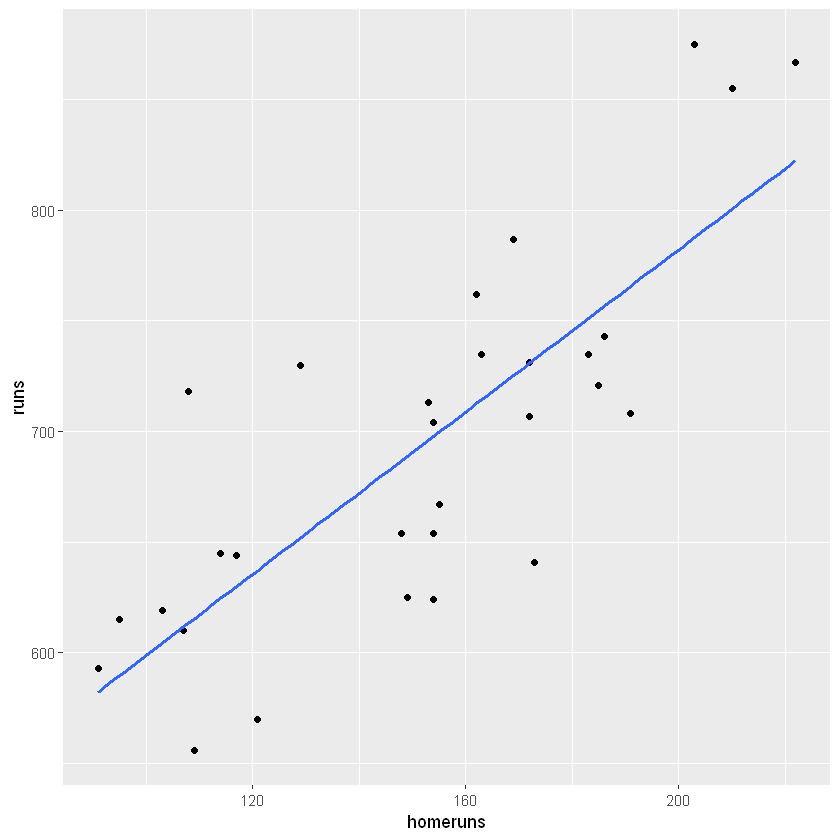

In [17]:
ggplot(data = mlb11, aes(x = homeruns, y = runs)) +
  geom_point() +
  stat_smooth(method = "lm", se = FALSE)

**Exercise**: How does this relationship compare to the relationship between `runs` and `at_bats`? Use the R$^2$ values from the two model summaries to compare. Does your variable seem to predict `runs` better than `at_bats`? How can you tell?

In [18]:
mod1 = lm(runs ~ homeruns, data =mlb11)

mod2 = lm(runs ~ at_bats, data = mlb11)

In [19]:
summary(mod1)


Call:
lm(formula = runs ~ homeruns, data = mlb11)

Residuals:
    Min      1Q  Median      3Q     Max 
-91.615 -33.410   3.231  24.292 104.631 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 415.2389    41.6779   9.963 1.04e-10 ***
homeruns      1.8345     0.2677   6.854 1.90e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 51.29 on 28 degrees of freedom
Multiple R-squared:  0.6266,	Adjusted R-squared:  0.6132 
F-statistic: 46.98 on 1 and 28 DF,  p-value: 1.9e-07


In [20]:
summary(mod2)


Call:
lm(formula = runs ~ at_bats, data = mlb11)

Residuals:
    Min      1Q  Median      3Q     Max 
-125.58  -47.05  -16.59   54.40  176.87 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2789.2429   853.6957  -3.267 0.002871 ** 
at_bats         0.6305     0.1545   4.080 0.000339 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 66.47 on 28 degrees of freedom
Multiple R-squared:  0.3729,	Adjusted R-squared:  0.3505 
F-statistic: 16.65 on 1 and 28 DF,  p-value: 0.0003388


Answer: "homeruns" looks better to predict runs than "at_bats". The reason is that is `Adjusted R-squared:`  0.6132 against 0.3505. The same for `Residual standard error:` 51.29 against 66.47.

**9. Now that you can summarize the linear relationship between two variables, investigate the relationships between `runs` and each of the other five traditional variables. Which variable best predicts `runs`? Support your conclusion using the graphical and numerical methods we've discussed.**

In [21]:
# To Multiple Graphs with ggplot
#install.packages("ggpubr")
library(ggpubr)

In [22]:
# 4 figures arranged in 2 rows and 2 columns
#attach(mtcars)
par(mfrow=c(2,2))

a = ggplot(data = mlb11, aes(x = at_bats, y = runs)) +
  geom_point() +
  stat_smooth(method = "lm", se = FALSE)

b = ggplot(data = mlb11, aes(x = hits, y = runs)) +
  geom_point() +
  stat_smooth(method = "lm", se = FALSE)

c = ggplot(data = mlb11, aes(x = wins, y = runs)) +
  geom_point() +
  stat_smooth(method = "lm", se = FALSE)

d = ggplot(data = mlb11, aes(x = bat_avg, y = runs)) +
  geom_point() +
  stat_smooth(method = "lm", se = FALSE)

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



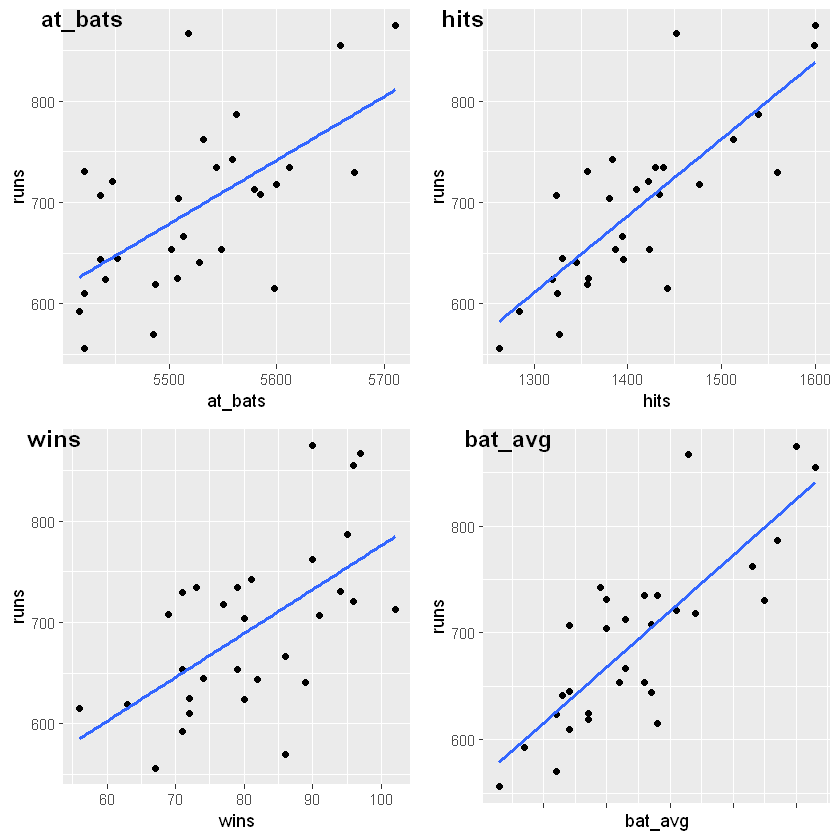

In [23]:
ggarrange(a, b, c, d + rremove("x.text"), 
          labels = c("at_bats", "hits", "wins", "bat_avg"),
          ncol = 2, nrow = 2)

In [24]:
summary(lm( runs ~ at_bats, mlb11))


Call:
lm(formula = runs ~ at_bats, data = mlb11)

Residuals:
    Min      1Q  Median      3Q     Max 
-125.58  -47.05  -16.59   54.40  176.87 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2789.2429   853.6957  -3.267 0.002871 ** 
at_bats         0.6305     0.1545   4.080 0.000339 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 66.47 on 28 degrees of freedom
Multiple R-squared:  0.3729,	Adjusted R-squared:  0.3505 
F-statistic: 16.65 on 1 and 28 DF,  p-value: 0.0003388


In [25]:
summary(lm( runs ~ hits, mlb11))


Call:
lm(formula = runs ~ hits, data = mlb11)

Residuals:
     Min       1Q   Median       3Q      Max 
-103.718  -27.179   -5.233   19.322  140.693 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -375.5600   151.1806  -2.484   0.0192 *  
hits           0.7589     0.1071   7.085 1.04e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 50.23 on 28 degrees of freedom
Multiple R-squared:  0.6419,	Adjusted R-squared:  0.6292 
F-statistic:  50.2 on 1 and 28 DF,  p-value: 1.043e-07


In [26]:
summary(lm( runs ~ wins, mlb11))


Call:
lm(formula = runs ~ wins, data = mlb11)

Residuals:
     Min       1Q   Median       3Q      Max 
-145.450  -47.506   -7.482   47.346  142.186 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  342.121     89.223   3.834 0.000654 ***
wins           4.341      1.092   3.977 0.000447 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 67.1 on 28 degrees of freedom
Multiple R-squared:  0.361,	Adjusted R-squared:  0.3381 
F-statistic: 15.82 on 1 and 28 DF,  p-value: 0.0004469


In [27]:
summary(lm( runs ~ bat_avg, mlb11))


Call:
lm(formula = runs ~ bat_avg, data = mlb11)

Residuals:
    Min      1Q  Median      3Q     Max 
-94.676 -26.303  -5.496  28.482 131.113 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -642.8      183.1  -3.511  0.00153 ** 
bat_avg       5242.2      717.3   7.308 5.88e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 49.23 on 28 degrees of freedom
Multiple R-squared:  0.6561,	Adjusted R-squared:  0.6438 
F-statistic: 53.41 on 1 and 28 DF,  p-value: 5.877e-08


                               at_bats    hits    wins    bat_avg    
    Residual standard error:    66.47    50.23    67.1    49.23
    Multiple R-squared:        0.3729   0.6419   0.361    0.6561

Answer: Batting average (bat_avg).

**10. Now examine the three newer variables.  These are the statistics used by the author of *Moneyball* to predict a teams success.  In general, are they more or less effective at predicting runs that the old variables?  Explain using appropriate graphical and numerical evidence.  Of all ten variables we've analyzed, which seems to be the best predictor of `runs`?**

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



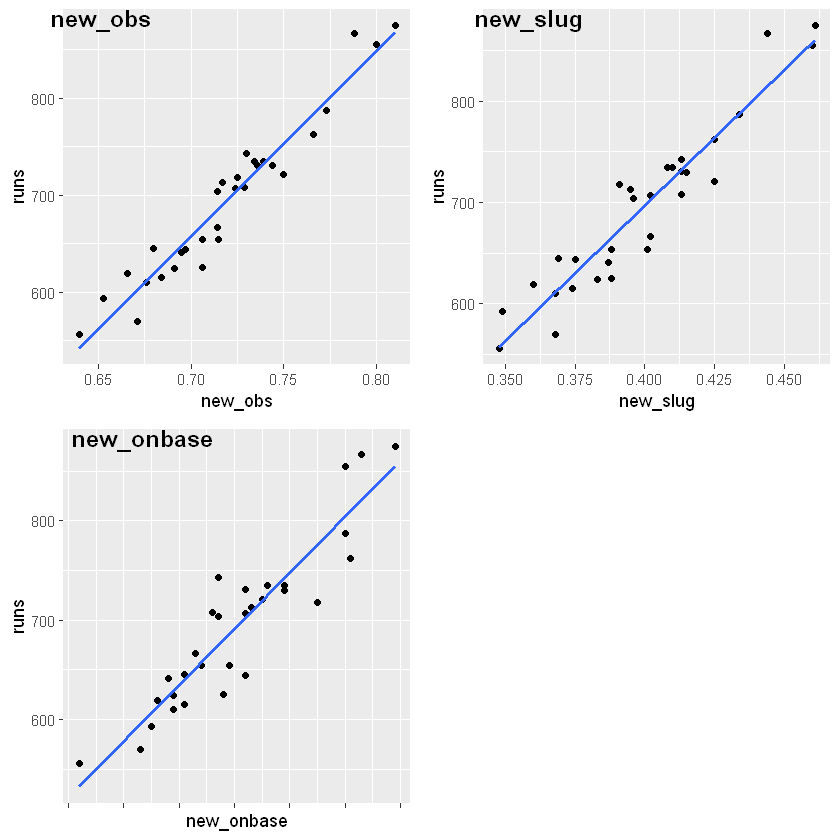

In [28]:
a2 = ggplot(data = mlb11, aes(x = new_obs, y = runs)) +
      geom_point() +
      stat_smooth(method = "lm", se = FALSE)

b2 = ggplot(data = mlb11, aes(x = new_slug, y = runs)) +
      geom_point() +
      stat_smooth(method = "lm", se = FALSE)

c2 = ggplot(data = mlb11, aes(x = new_onbase, y = runs)) +
      geom_point() +
      stat_smooth(method = "lm", se = FALSE)

ggarrange(a2, b2, c2 + rremove("x.text"), 
          labels = c("new_obs", "new_slug", "new_onbase"),
          ncol = 2, nrow = 2)

In [29]:
summary(lm( runs ~ new_obs, mlb11))


Call:
lm(formula = runs ~ new_obs, data = mlb11)

Residuals:
    Min      1Q  Median      3Q     Max 
-43.456 -13.690   1.165  13.935  41.156 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -686.61      68.93  -9.962 1.05e-10 ***
new_obs      1919.36      95.70  20.057  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 21.41 on 28 degrees of freedom
Multiple R-squared:  0.9349,	Adjusted R-squared:  0.9326 
F-statistic: 402.3 on 1 and 28 DF,  p-value: < 2.2e-16


In [30]:
summary(lm( runs ~ new_slug, mlb11))


Call:
lm(formula = runs ~ new_slug, data = mlb11)

Residuals:
   Min     1Q Median     3Q    Max 
-45.41 -18.66  -0.91  16.29  52.29 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -375.80      68.71   -5.47 7.70e-06 ***
new_slug     2681.33     171.83   15.61 2.42e-15 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 26.96 on 28 degrees of freedom
Multiple R-squared:  0.8969,	Adjusted R-squared:  0.8932 
F-statistic: 243.5 on 1 and 28 DF,  p-value: 2.42e-15


In [31]:
summary(lm( runs ~ new_onbase, mlb11))


Call:
lm(formula = runs ~ new_onbase, data = mlb11)

Residuals:
    Min      1Q  Median      3Q     Max 
-58.270 -18.335   3.249  19.520  69.002 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1118.4      144.5  -7.741 1.97e-08 ***
new_onbase    5654.3      450.5  12.552 5.12e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 32.61 on 28 degrees of freedom
Multiple R-squared:  0.8491,	Adjusted R-squared:  0.8437 
F-statistic: 157.6 on 1 and 28 DF,  p-value: 5.116e-13


                               new_obs   new_slug  new_onbase 
    Residual standard error:    21.41     26.96     32.61
    Multiple R-squared:        0.9349    0.8969    0.8491

Answer: On-base plus slugging (new_obs).

**Exercise**: Check the model diagnostics for the regression model with the variable you decided was the best predictor for runs.

Answer: On-base plus slugging (new_obs).